# Super duper basic introduction to sparsity

Sparse matrices can save memory and time in several key operations. Consider a matrix $A \in \mathbb{R}^{m \times n}$ stored using double precision numbers:

- **Dense Storage**: Requires $8mn$ bytes.
- **Sparse Storage**: Typically requires approximately $16 \times n_{nz}$ bytes or less, depending on the storage format, where $n_{nz}$ represents the number of non-zero elements.

In terms of computational operations:

1. **Operation $y \leftarrow y + Ax$**:
   - **Dense**: Requires $mn$ floating point operations (flops).
   - **Sparse**: Requires $n_{nz}$ flops.

2. **Operation $x \leftarrow T^{-1}x$, where $T \in \mathbb{R}^{n \times n}$ is a triangular, nonsingular matrix**:
   - **Dense**: Requires $\frac{n^2}{2}$ flops.
   - **Sparse**: Requires $n_{nz}$ flops.


# Several Methods Used for Storing Sparse Matrices

Sparse matrices can be stored in various formats, each with its own advantages and limitations. Below are some of the common methods used:

- **List of Triples (COO)**: The simplest method, though typically not used, is to store the sparse matrix as a list of $(i, j, A_{_ij})$ triples, where each triple represents the row index $(i)$, column index $(j)$, and the value at that position $(A_{_ij})$.

- **Compressed sparse column (CSC)**: This method involves an array of pairs $(A_{_ij}, i)$, and an array of pointers into this array that indicate the start of a new column. Each entry $(A_{_ij}, i)$ contains the value $A_{_ij}$ and the row index $i$. The array of pointers is used to quickly access the start of each column.

- **Exotic Data Structures for High-End Work**: For more advanced applications, particularly in high-performance computing, more exotic and complex data structures are employed to optimize operations and storage.

- **Lack of Universal Standard**: Unfortunately, there is no universal standard for sparse matrix storage yet. Different applications and software may use different formats based on specific requirements and optimization criteria.

## CSR format

![](https://camo.githubusercontent.com/b30a4bc4003a45a114c2b590cf33a30236c93e031dfbcbc4d4768a195df62d2a/68747470733a2f2f7777772e6b61726c727570702e6e65742f77702d636f6e74656e742f75706c6f6164732f323031362f30322f6373725f73746f726167655f7370617273655f6d617269782e706e67)

In [40]:
import numpy as np
from scipy.sparse import csr_matrix

# Create a dense matrix
dense_matrix = np.array([
    [1, 0, 5, 0],
    [2, 3, 0, 0],
    [4, 0, 0, 1],
    [0, 0, 2, 0]
])

# Convert to a sparse matrix (CSR format)
sparse_matrix = csr_matrix(dense_matrix)

print("Dense Matrix:\n", dense_matrix)
print("\nSparse Matrix (CSR):\n", sparse_matrix)

# Display the data, indices, and indptr of the CSR matrix
print("Data (values):", sparse_matrix.data)
print("Column indices:", sparse_matrix.indices)
print("Row start:", sparse_matrix.indptr)



Dense Matrix:
 [[1 0 5 0]
 [2 3 0 0]
 [4 0 0 1]
 [0 0 2 0]]

Sparse Matrix (CSR):
   (0, 0)	1
  (0, 2)	5
  (1, 0)	2
  (1, 1)	3
  (2, 0)	4
  (2, 3)	1
  (3, 2)	2
Data (values): [1 5 2 3 4 1 2]
Column indices: [0 2 0 1 0 3 2]
Row start: [0 2 4 6 7]


## Sparse Matrix Creation and Manipulation

In [18]:
import numpy as np
from scipy.sparse import csr_matrix

# Create a random sparse matrix
np.random.seed(0)
n = 10
threshold = 0.1
random_matrix = np.random.random((n, n)) < threshold
sparse_matrix = csr_matrix(random_matrix.astype(int))

# Print the sparse matrix
# print("Sparse Matrix:")
# print(sparse_matrix)

# Perform some basic operations
# print("\nMatrix Transpose:")
# print(sparse_matrix.T)

# print("\nMatrix Multiplication (with itself):")
# print(sparse_matrix.dot(sparse_matrix))

print(f"Sparsity: {len(sparse_matrix.data)/(n**2)}")

Sparsity: 0.12


Text(0.5, 1.0, 'Random square matrix A of size 10 <= t')

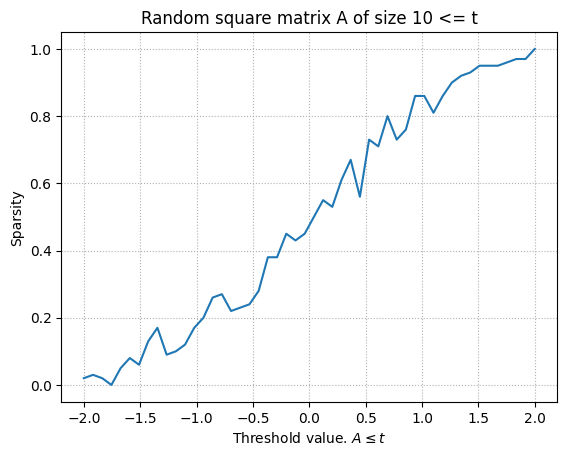

In [36]:
import numpy as np
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt

# Function to calculate sparsity based on threshold
def calculate_sparsity(n, threshold):
    random_matrix = np.random.randn(n, n) < threshold
    sparse_matrix = csr_matrix(random_matrix.astype(int))
    return len(sparse_matrix.data) / (n ** 2)

# Setting up parameters
n = 10
thresholds = np.linspace(-2, 2, 50)
sparsities = [calculate_sparsity(n, threshold) for threshold in thresholds]

plt.plot(thresholds, sparsities)
plt.xlabel(r"Threshold value. $A \leq t$")
plt.ylabel("Sparsity")
plt.grid(linestyle=":")
plt.title(f"Random square matrix A of size {n} <= t")
plt.show()

## Solving a Sparse System of Linear Equations

In [2]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import rand

# Create a sparse matrix A and a vector b
A = rand(1000, 1000, density=0.01, format='csr')
b = np.random.rand(1000)

# Solve Ax = b
x = spsolve(A, b)

# Print the solution
print("Solution, x:")
print(x)

Solution, x:
[ 7.61500244e+02  1.16107066e+03  3.12876950e+02  2.06909658e+02
 -1.60559531e+03 -3.21258571e+02 -1.60453388e+03 -1.18490854e+03
  2.02494940e+03 -8.78172983e+02  2.64629501e+03 -9.36684580e+02
  1.90363354e+02  4.71695307e+02  2.37686455e+01  1.75345100e+02
  1.47326551e+03  1.33748902e+03  2.69110406e+03  7.15918958e+02
 -3.58084347e+02  1.33094593e+03 -8.36753211e+02  5.91489875e+01
 -1.27726430e+03  3.36937458e-01 -1.95908649e+03 -8.34852992e+02
  5.88841509e+00  1.94205574e+02 -2.33619129e+02 -1.29340202e+02
 -7.11832602e+02 -6.63590776e+02  1.25879218e+02  2.70823139e+03
 -7.41992070e+02  8.97354071e+02  3.02452167e+02 -5.24854065e+00
  1.26833010e+03 -1.32256452e+03  8.63860060e+02 -1.44656742e+03
  3.27431614e+02 -1.03911203e+02 -8.90396046e+02 -1.00244829e+03
  1.19286404e+03 -3.24473190e+02 -3.31426999e+02 -1.66974105e+03
 -4.45128204e+01  3.63973157e+01 -6.06928249e+02 -1.15187851e+03
 -1.29831201e+02  1.57456666e+03  9.26634101e+02 -1.26387948e+03
 -7.41615581

## Eigenvalue Computation of a Large Sparse Matrix

In [3]:
from scipy.sparse.linalg import eigs

# Create a large sparse matrix
A = rand(10000, 10000, density=0.001, format='csr')

# Compute the first 5 eigenvalues
eigenvalues, eigenvectors = eigs(A, k=5)

# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[4.99578341+0.j         1.4988026 +1.0682832j  1.4988026 -1.0682832j
 1.78552735+0.43500691j 1.78552735-0.43500691j]


## Large-Scale Graph Analysis using Sparse Matrices

Graphs in real-world applications, like social networks or web graphs, can have millions of nodes and edges. Representing such large graphs as dense adjacency matrices is often infeasible due to the enormous memory requirements. However, since these graphs are typically sparse (most node pairs are not directly connected), they can be efficiently represented using sparse matrices.

Task:

Our task is to represent a large graph and calculate the number of paths of length two between nodes. A path of length two between two nodes means there's an intermediate node connecting them. For example, in a social network, it could represent a "friend of a friend" relationship. In matrix terms, finding paths of length two is equivalent to squaring the adjacency matrix (matrix multiplication with itself). Each element in the resulting matrix represents the number of paths of length two between corresponding nodes.
But for very large matrices, this operation is not practical with dense representations. 

### Small scale example

#### Example Graph

Imagine we have a graph with 4 nodes (0, 1, 2, 3), and the following edges:

* 0 is connected to 1 and 2
* 1 is connected to 2
* 2 is connected to 3

The adjacency matrix for this graph would look like this:

In [43]:
# Adjacency matrix
adjacency_matrix = np.array([[0, 1, 1, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1],
                             [0, 0, 0, 0]])

print(adjacency_matrix)

[[0 1 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


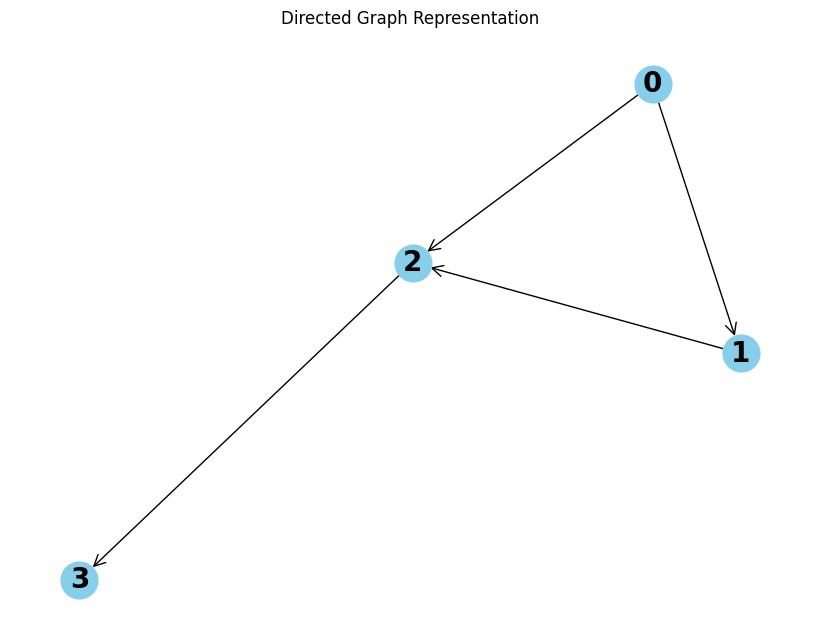

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([0, 1, 2, 3])

# Add edges
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, font_size=20, font_weight='bold', arrowstyle='->', arrowsize=20)
plt.title('Directed Graph Representation')
plt.show()


In this matrix, a '1' indicates an edge between two nodes, and a '0' indicates no edge.

#### Python Code to Square the Matrix
We can use Python to create this matrix and then square it to find paths of length two.

In [42]:
import numpy as np

# Adjacency matrix
adjacency_matrix = np.array([[0, 1, 1, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1],
                             [0, 0, 0, 0]])

# Squaring the matrix
squared_matrix = np.dot(adjacency_matrix, adjacency_matrix)

print("Squared Matrix:")
print(squared_matrix)


Squared Matrix:
[[0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]]


#### Interpretation
- In the squared matrix, a non-zero entry at (i, j) indicates the number of paths of length two from node i to node j.
- For example, if `squared_matrix[0, 3]` is `1`, it means there is one path of length two from node 0 to node 3.

This method is powerful in graph theory and network analysis as it provides a quick way to find indirect connections in a network. It is especially useful in social network analysis, where finding paths of length two can represent potential introductions or connections between people who are not directly connected but share a mutual connection. 

In [1]:
from scipy.sparse import random as sparse_random
from scipy.sparse.linalg import norm

# Parameters
n_nodes = 10000  # Number of nodes in the graph
density = 0.00001  # Very low density

# Create a large, sparse adjacency matrix for the graph
adjacency_matrix = sparse_random(n_nodes, n_nodes, density=density, format='csr')

# Compute the square of the matrix
# This represents the number of paths of length two between nodes
square_matrix = adjacency_matrix.dot(adjacency_matrix)

# Compute the Frobenius norm (just as an example of some computation on the result)
frobenius_norm = norm(square_matrix)

print("Frobenius Norm of the Squared Matrix:", frobenius_norm)


Frobenius Norm of the Squared Matrix: 3.181022877576384


## Sparse orderings

Sparse orderings can have a dramatic effect on the sparsity of a factorization

* First: spy diagram of original NW arrow matrix
* Second: spy diagram of Cholesky factor with no permutation ($P = I$)
* Third: spy diagram of Cholesky factor with the best permutation (permute $1 \to n$)

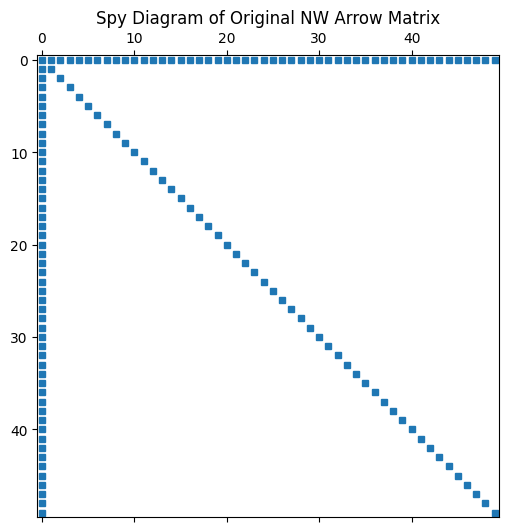

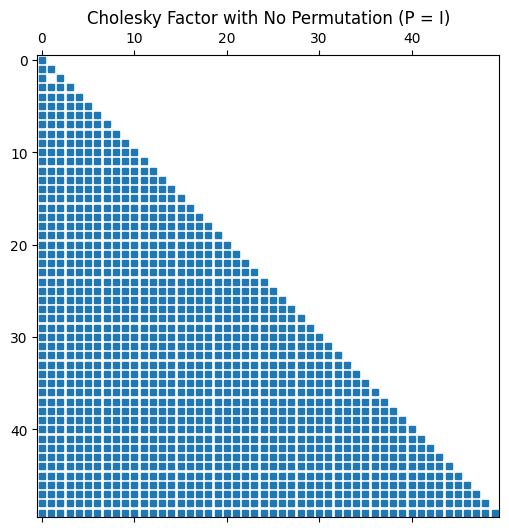

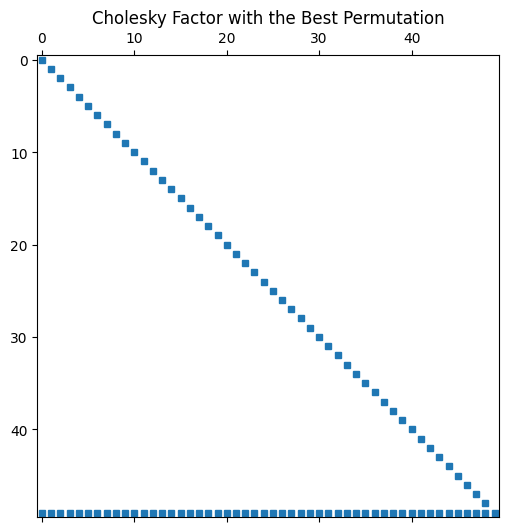

Non-zeros in L without permutation: 1274
Non-zeros in L with permutation: 99


In [14]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

def nw_arrow_matrix(n):
    """
    Create a NW (North-West) arrow matrix of size n x n.
    The entire first row and first column are filled with 1s,
    and the rest is a diagonal matrix.
    """
    A = np.eye(n)  # Create an identity matrix
    A[0, :] = 1    # Set the first row to 1s
    A[:, 0] = 1    # Set the first column to 1s

    return sp.csc_matrix(A)  # Convert to sparse matrix

def plot_spy(A, title):
    """
    Plot the spy diagram of a sparse matrix.
    """
    plt.figure(figsize=(6, 6))
    plt.spy(A, markersize=5)
    plt.title(title)
    plt.show()

n = 50  # Size of the matrix
A = nw_arrow_matrix(n).tocsc()

# Original NW arrow matrix
plot_spy(A, "Spy Diagram of Original NW Arrow Matrix")

# Cholesky factor without permutation
L_noperm = spla.splu(A, permc_spec='NATURAL').L
plot_spy(L_noperm, "Cholesky Factor with No Permutation (P = I)")

# Cholesky factor with best permutation
perm = np.arange(n)  # Example permutation (1 to n)
perm = np.flip(perm)  # Reverse the order for demonstration
P = sp.csc_matrix((np.ones(n), (perm, np.arange(n))), shape=(n, n))
A_perm = P @ A @ P.T
L_perm = spla.splu(A_perm, permc_spec='NATURAL').L
plot_spy(L_perm, "Cholesky Factor with the Best Permutation")

print(f"Non-zeros in L without permutation: {L_noperm.nnz}")
print(f"Non-zeros in L with permutation: {L_perm.nnz}")


# References

* [nla.skoltech.ru](https://nla.skoltech.ru)
* [Numerical Linear Algebra Software](https://web.stanford.edu/class/ee364b/lectures/num-lin-alg-software.pdf) by S. Boyd